In [ ]:
import os
import numpy as np
import pandas as pd
import random
import seaborn as sns

import datetime as datetime
import matplotlib.dates as dates


In [4]:
df = pd.read_csv("/content/covid_19_indonesia_time_series_all.csv")
df.head()

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [ ]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
New Cases,21759.00000,391.29358,2074.55104,0.00000,7.00000,41.00000,151.00000,56757.00000
New Deaths,21759.00000,13.22041,76.48262,0.00000,0.00000,1.00000,5.00000,2069.00000
New Recovered,21759.00000,377.31100,1999.06256,0.00000,4.00000,31.00000,143.00000,48832.00000
New Active Cases,21759.00000,0.76217,937.21351,-25725.00000,-16.00000,0.00000,27.00000,36726.00000
Total Cases,21759.00000,85259.97082,368513.28585,1.00000,1822.50000,10780.00000,36464.50000,4257243.00000
Total Deaths,21759.00000,2648.28935,11776.01107,0.00000,50.00000,283.00000,1050.00000,143858.00000
Total Recovered,21759.00000,76712.60246,340395.71089,0.00000,1038.50000,8745.00000,32932.50000,4105680.00000
Total Active Cases,21759.00000,5899.07900,27518.10243,-2306.00000,182.00000,919.00000,2607.50000,574135.00000
City or Regency,0.00000,nan,nan,nan,nan,nan,nan,nan
Total Regencies,21759.00000,24.16026,68.70827,1.00000,7.00000,11.00000,18.00000,416.00000


In [ ]:
df.New_Cases = df["New Cases"] 
df.New_Deaths = df["New Deaths"]
df.New_Active_Cases = df["New Active Cases"]
df.total_deaths = df["Total Deaths"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-

In [ ]:
from datetime import datetime, date 
df['Date'] = pd.to_datetime(df.Date)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         21759 non-null  datetime64[ns]
 1   Location ISO Code            21759 non-null  object        
 2   Location                     21759 non-null  object        
 3   New Cases                    21759 non-null  int64         
 4   New Deaths                   21759 non-null  int64         
 5   New Recovered                21759 non-null  int64         
 6   New Active Cases             21759 non-null  int64         
 7   Total Cases                  21759 non-null  int64         
 8   Total Deaths                 21759 non-null  int64         
 9   Total Recovered              21759 non-null  int64         
 10  Total Active Cases           21759 non-null  int64         
 11  Location Level               21759 non-nu

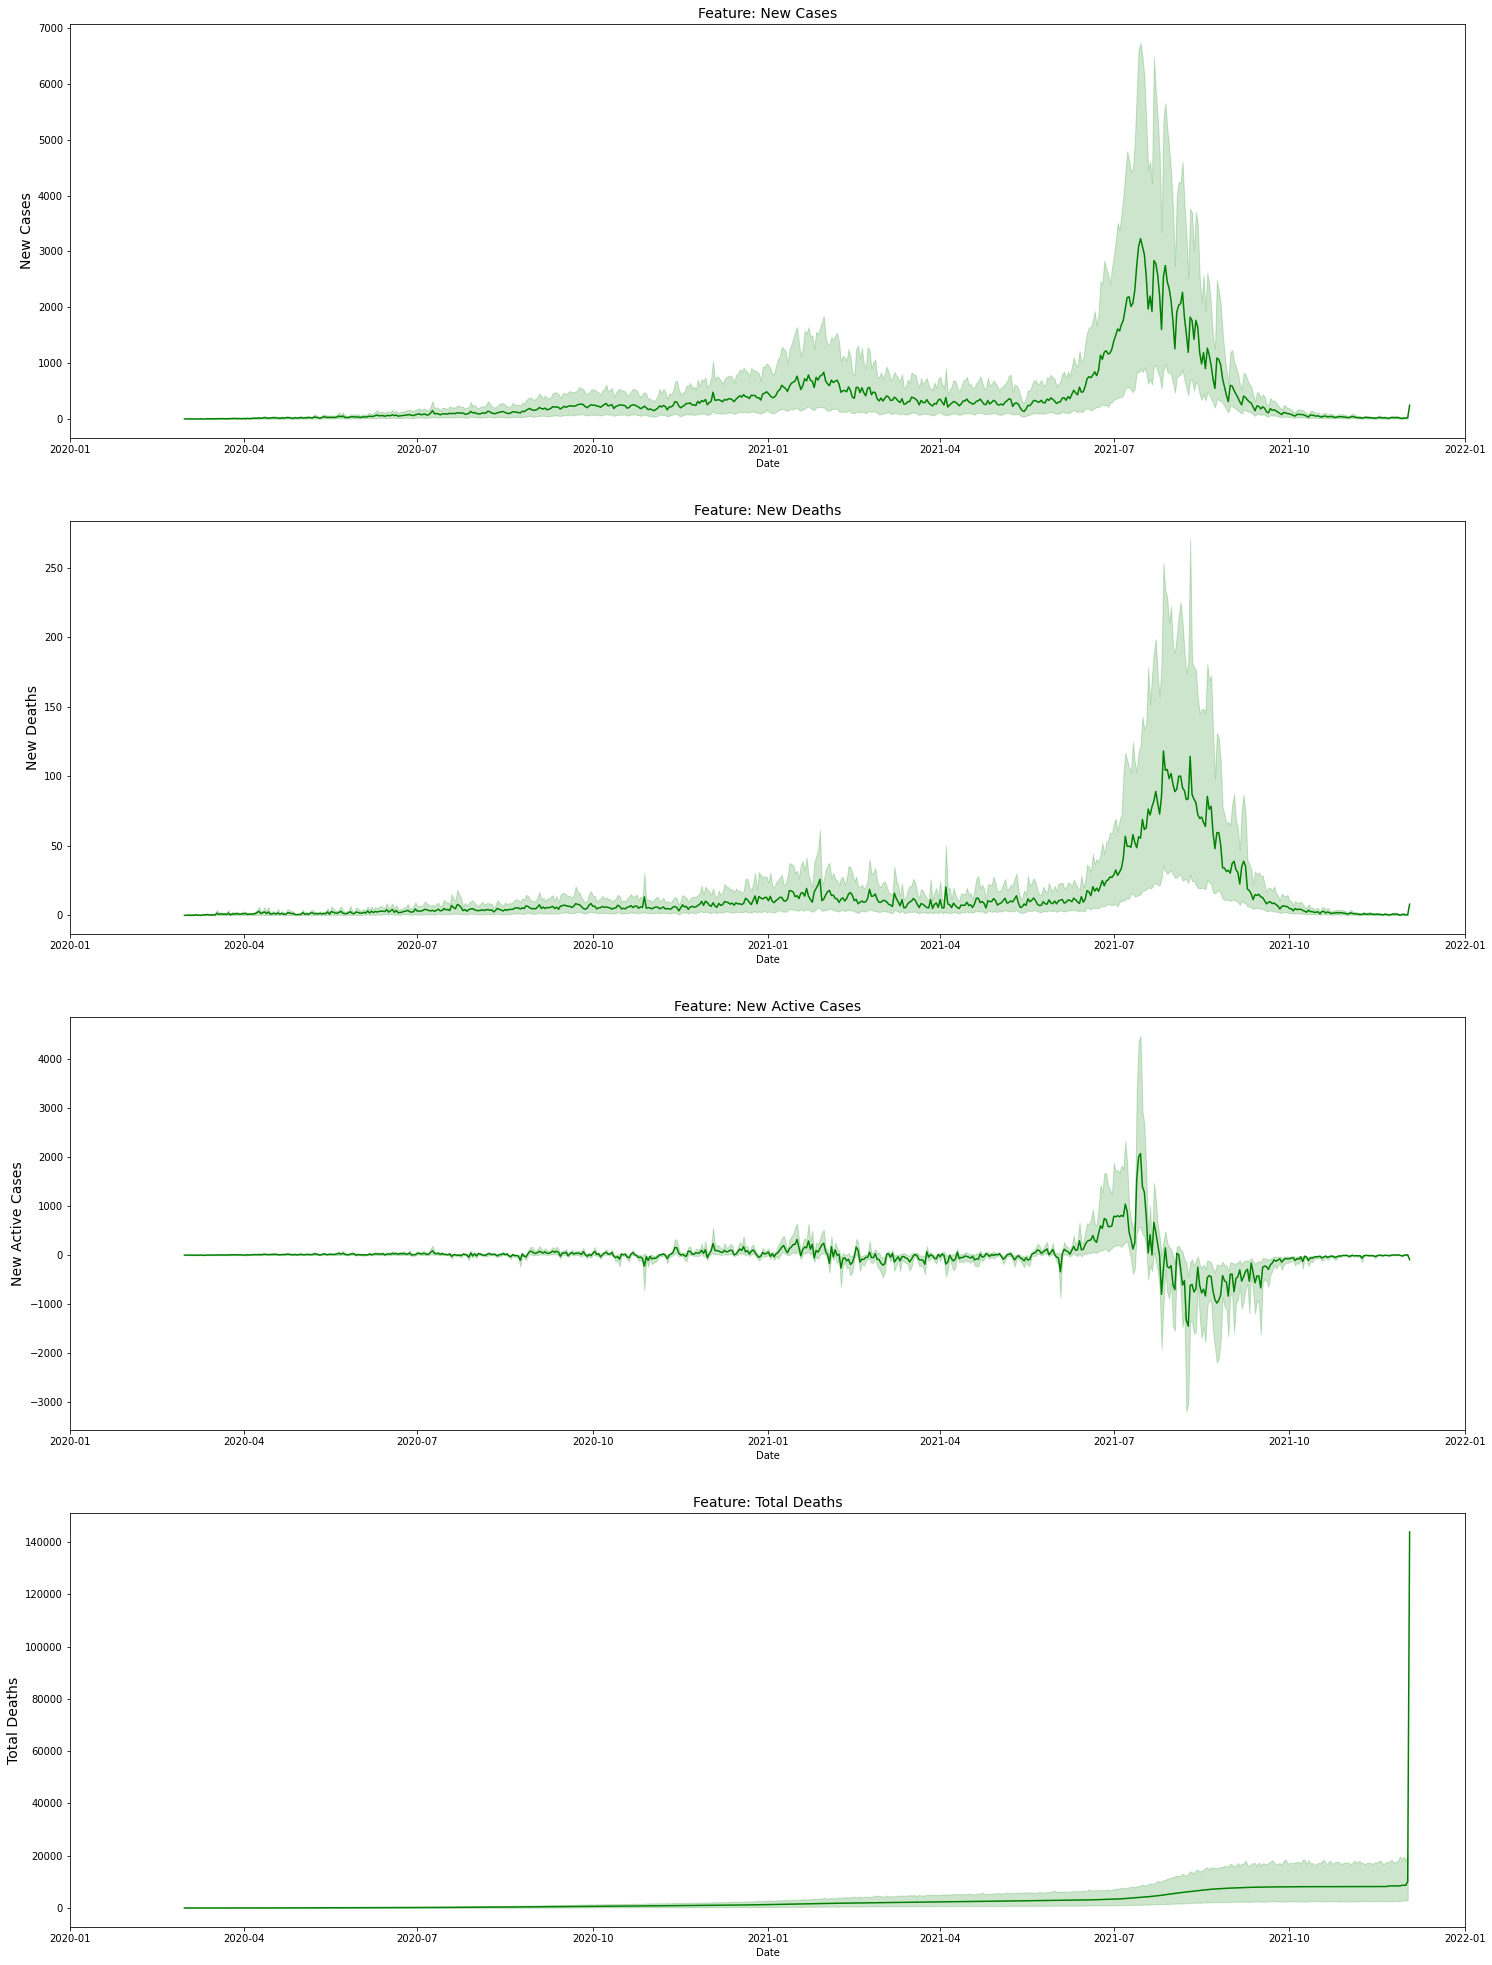

In [ ]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(25, 35))

sns.lineplot(x=df.Date, y=df.New_Cases.fillna(np.inf), ax=ax[0], color='green')
ax[0].set_title('Feature: New Cases', fontsize=14)
ax[0].set_ylabel(ylabel='New Cases', fontsize=14)

sns.lineplot(x=df.Date, y=df.New_Deaths.fillna(np.inf), ax=ax[1], color='green')
ax[1].set_title('Feature: New Deaths', fontsize=14)
ax[1].set_ylabel(ylabel='New Deaths', fontsize=14)

sns.lineplot(x=df.Date, y=df.New_Active_Cases.fillna(np.inf), ax=ax[2], color='green')
ax[2].set_title('Feature: New Active Cases', fontsize=14)
ax[2].set_ylabel(ylabel='New Active Cases', fontsize=14)

sns.lineplot(x=df.Date, y=df.total_deaths.fillna(np.inf), ax=ax[3], color='green')
ax[3].set_title('Feature: Total Deaths', fontsize=14)
ax[3].set_ylabel(ylabel='Total Deaths', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2020, 1, 1), date(2022, 1, 1)])

plt.show()